In [34]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('../Datasets/cases/Vehicle_Silhouettes/Vehicle.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

We do not need to scale for discriminant analysis.

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.91      0.98      0.94        59
        opel       0.59      0.56      0.58        62
        saab       0.60      0.51      0.56        68
         van       0.88      0.98      0.93        65

    accuracy                           0.76       254
   macro avg       0.74      0.76      0.75       254
weighted avg       0.74      0.76      0.75       254



In [37]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       1.00      0.98      0.99        59
        opel       0.75      0.66      0.70        62
        saab       0.74      0.74      0.74        68
         van       0.89      1.00      0.94        65

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



### transforming with lda and predicting with SVM
this is example of unsupervised learning with LDA. We cannot do this with QDA.

We should use LDA mostly for transforming, for classification we should use other algos ?

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

pipe = Pipeline(steps=[
    ('lda_transform', LinearDiscriminantAnalysis()),
    ('svm', SVC(C=1, kernel='rbf', gamma=1))
    # ('lr', LogisticRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         bus       0.91      0.88      0.90        59
        opel       0.60      0.68      0.64        62
        saab       0.60      0.50      0.54        68
         van       0.91      0.98      0.95        65

    accuracy                           0.76       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.75      0.76      0.75       254



<Axes: xlabel='lineardiscriminantanalysis0', ylabel='lineardiscriminantanalysis1'>

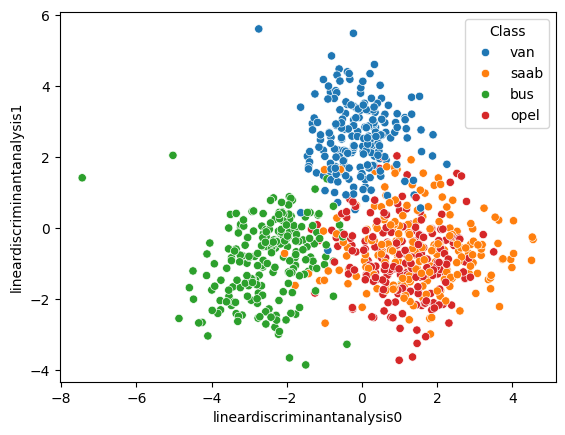

In [53]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
X_lda = lda.fit_transform(X, y)
X_lda['Class'] = df['Class']
sns.scatterplot(x='lineardiscriminantanalysis0', y='lineardiscriminantanalysis1', data=X_lda, hue='Class')


# IRIS DATASET

In [26]:
iris = pd.read_csv('../Datasets/iris.csv')
X = iris.drop('Species', axis=1)
y = iris['Species']
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=25, stratify=y)

LDA

In [27]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



QDA

In [28]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### TRANSFORMATION WITH SCATTER PLOT?
LDA.fit_transform -> Gives two column -> lineardiscriminantanalysis0 and lineardiscriminantanalysis1

     lineardiscriminantanalysis0  lineardiscriminantanalysis1
0                       8.061800                    -0.300421
1                       7.128688                     0.786660
2                       7.489828                     0.265384
3                       6.813201                     0.670631
4                       8.132309                    -0.514463
..                           ...                          ...
145                    -5.645003                    -1.677717
146                    -5.179565                     0.363475
147                    -4.967741                    -0.821141
148                    -5.886145                    -2.345091
149                    -4.683154                    -0.332034

[150 rows x 2 columns]


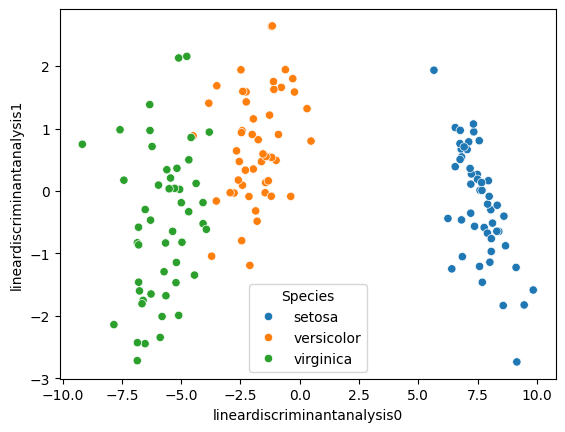

In [32]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
X_lda = lda.fit_transform(X,y)
print(X_lda)
X_lda['Species'] = iris['Species']
sns.scatterplot(data=X_lda, x='lineardiscriminantanalysis0', y='lineardiscriminantanalysis1', hue='Species')
plt.show()